In [31]:
sessionData = {'date': ["1/1/17","1/2/17","1/3/17","1/4/17","1/5/17","1/6/17","1/7/17","1/8/17","1/9/17","1/10/17",
"1/11/17","1/12/17","1/13/17","1/14/17","1/15/17","1/16/17","1/17/17","1/18/17","1/19/17","1/20/17",
"1/21/17","1/22/17","1/23/17","1/24/17","1/25/17","1/26/17","1/27/17","1/28/17","1/29/17","1/30/17",
"1/31/17","2/1/17","2/2/17","2/3/17","2/4/17","2/5/17","2/6/17","2/7/17","2/8/17","2/9/17","2/10/17",
"2/11/17","2/12/17","2/13/17","2/14/17","2/15/17","2/16/17","2/17/17","2/18/17","2/19/17","2/20/17",
"2/21/17","2/22/17","2/23/17","2/24/17","2/25/17","2/26/17","2/27/17","2/28/17","3/1/17","3/2/17","3/3/17",
"3/4/17","3/5/17","3/6/17","3/7/17","3/8/17","3/9/17","3/10/17","3/11/17","3/12/17","3/13/17","3/14/17",
"3/15/17","3/16/17","3/17/17","3/18/17","3/19/17","3/20/17","3/21/17","3/22/17","3/23/17","3/24/17",
"3/25/17","3/26/17","3/27/17","3/28/17","3/29/17","3/30/17","3/31/17","4/1/17","4/2/17","4/3/17",
"4/4/17","4/5/17","4/6/17","4/7/17","4/8/17","4/9/17","4/10/17"],
     'sessions': [88215,88484,87877,86780,84622,84607,84362,84912,84367,85991,86562,86761,85735,85386,84023,
83504,83795,85127,84971,86433,88094,89120,89184,90188,88540,88693,88031,86601,87447,87716,87042,87039,
86197,84339,85095,84764,83386,82621,83256,82997,84614,84480,86006,86436,85711,84115,83612,84812,85036,
84844,83745,85598,84914,85813,86634,86995,88356,87731,89142,90383,90686,93692,93800,93502,93786,92292,
91104,90193,90341,89314,88861,88853,89992,90246,90968,89741,88718,88335,87898,87666,88600,90110,90401,
90370,90346,89691,90643,90489,91289,89290,88668,89804,88989,89976,88239,87444,86951,85434,85655,
85105]}

sessionsDf = pd.DataFrame(data = sessionData)

In [30]:
from pandas import Series
from matplotlib import pyplot
import pandas as pd
from statsmodels.tsa.ar_model import AR
import sklearn
from sklearn.metrics import mean_squared_error
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly
from plotly.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotly/grid_objs/grid_objs.py:8: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working



In [48]:
sessionsDf.head()

,ds,y
0,1/1/17,88215
1,1/2/17,88484
2,1/3/17,87877
3,1/4/17,86780
4,1/5/17,84622


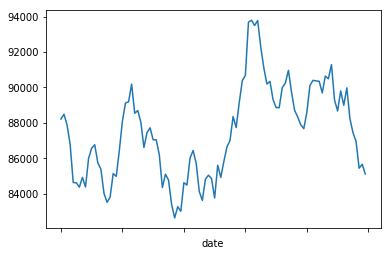

In [33]:
ser = pd.Series(sessionsDf['sessions'].values, index = sessionsDf['date'])
ser.plot()
pyplot.show()

In [34]:
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return np.array(diff)

def predict(coef, history):
    yhat = coef[0]
    for i in range(1, len(coef)):
        yhat += coef[i] * history[-i]
    return yhat
#-----------------
X = difference(ser.values)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:]
model = AR(train)
model_fit = model.fit(maxlag=15, disp=False)
window = model_fit.k_ar
coef = model_fit.params
#------------------
history = [train[i] for i in range(len(train))]
predictions = list()
for t in range(len(test)):
	yhat = predict(coef, history)
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
#-------------------

Test MSE: 826351.595


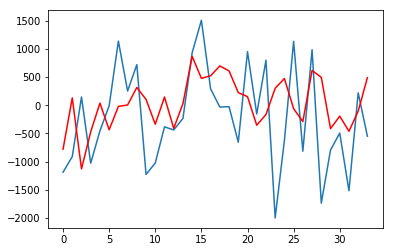

In [35]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [36]:
"""
decomposition = sm.tsa.seasonal_decompose(ser, model='additive')
fig = decomposition.plot()
plt.show()
"""
from fbprophet import Prophet

In [ ]:
session_pr = sessionsDf
session_pr.head()
session_pr.columns = ['ds','y']

In [40]:
ser_model = Prophet(interval_width=0.95)
ser_model.fit(session_pr)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [52]:
ser_fct = ser_model.make_future_dataframe(periods=60,freq='d')
ser_fct = ser_model.predict(ser_fct)

Text(0.5, 1.0, 'Sessions')

<Figure size 1584x576 with 0 Axes>

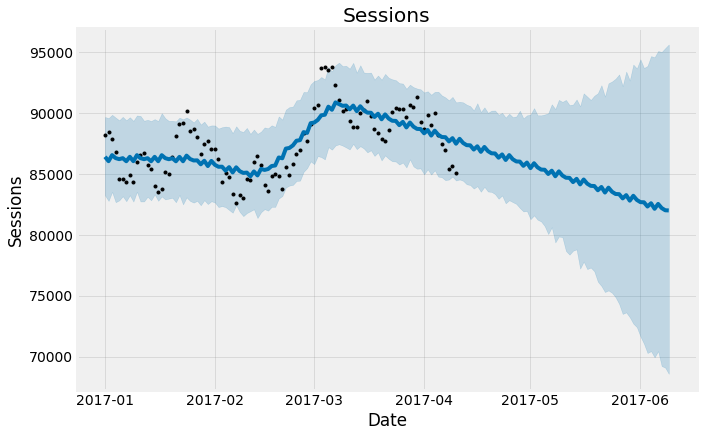

In [53]:
plt.figure(figsize=(22, 8))
plt.style.use('fivethirtyeight')
ser_model.plot(ser_fct,xlabel='Date', ylabel='Sessions')
plt.title('Sessions')

In [55]:
ser_fct.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,86268.350721,83238.507065,89677.543993,86268.350721,86268.350721,143.594885,143.594885,143.594885,143.594885,143.594885,143.594885,0.0,0.0,0.0,86411.945606
1,2017-01-02,86268.019264,82784.639089,89585.089705,86268.019264,86268.019264,-218.046861,-218.046861,-218.046861,-218.046861,-218.046861,-218.046861,0.0,0.0,0.0,86049.972402
2,2017-01-03,86267.687807,83534.118012,89856.548988,86267.687807,86267.687807,279.878575,279.878575,279.878575,279.878575,279.878575,279.878575,0.0,0.0,0.0,86547.566382
3,2017-01-04,86267.356349,82684.973632,89627.951097,86267.356349,86267.356349,34.233064,34.233064,34.233064,34.233064,34.233064,34.233064,0.0,0.0,0.0,86301.589413
4,2017-01-05,86267.024891,82831.370244,89407.165922,86267.024891,86267.024891,-50.874731,-50.874731,-50.874731,-50.874731,-50.874731,-50.874731,0.0,0.0,0.0,86216.150159


Text(0, 0.5, 'Sessions')

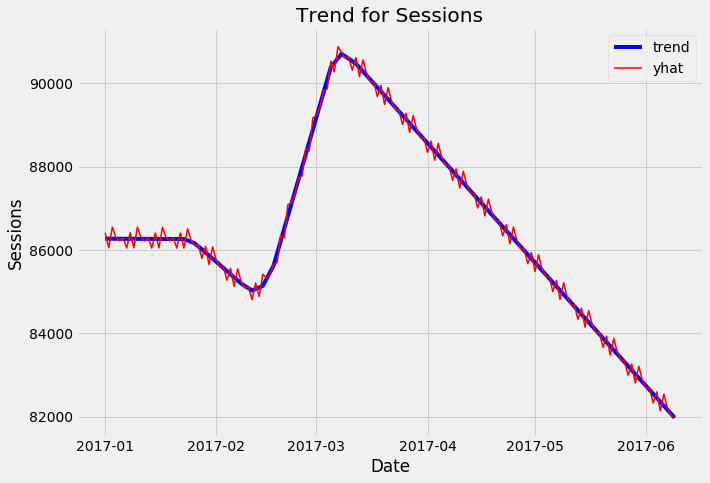

In [62]:
plt.figure(figsize=(10, 7))
plt.plot(ser_fct['ds'], ser_fct['trend'], 'b-')
plt.plot(ser_fct['ds'], ser_fct['yhat'], 'r-', linewidth = 1.5)
plt.title('Trend for Sessions')
plt.xlabel('Date')
plt.legend()
plt.ylabel('Sessions')